## Mini SEM sensitivity analysis
Lindsey Gulden, 2025

Partial figures, tables, and analysis for 
[The emperor is naked: A critical assessment of the IPCC and IEA consensus that Carbon Capture and Storage is a key climate solution](https://docs.google.com/document/d/1dIV09bQsbgTpiZaqHVJySI7fLKiCGyUka4Upy9KsYSM/edit?usp=sharing)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import warnings
from projects.iam.mini_sem import NestedLogitIAM

warnings.filterwarnings("ignore")
%load_ext jupyter_black

# bespoke function
def process_iam_output(in_df):
    """bespoke funciton to process outputs from IAM simulations"""
    in_df.index.name = "energy_source"
    in_df.columns = [int(x) for x in [2020, 2025, 2030, 2035, 2040, 2045, 2050]]



### Get baseline model run with default parameters and Nested Logit

In [ ]:
iam = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_baseline_config.yml"
)
baseline_df = iam.simulate(True)

iam_realistic = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_config_realistic.yml"
)
iam_realistic_df = iam_realistic.simulate(True)

iam_logit_realistic = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_config_logit.yml"
)
logit_df = iam_logit_realistic.simulate(True)

iam_cost_realistic = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_config_ccs_cost_increase.yml"
)
cost_df = iam_cost_realistic.simulate(True)

iam_trajectory = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_config_trajectory.yml"
)
trajectory_df = iam_trajectory.simulate(True)
iam_price = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_config_co2_price.yml"
)
price_df = iam_price.simulate(True)

iam_ccs_performance = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_config_ccs_performance.yml"
)
ccs_perf_df = iam_ccs_performance.simulate(True)

iam_starting_price = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_config_starting_prices.yml"
)
starting_price_df = iam_starting_price.simulate(True)

# reformat outputs
for in_df in [
    baseline_df,
    iam_realistic_df,
    trajectory_df,
    logit_df,
    cost_df,
    ccs_perf_df,
    price_df,
    starting_price_df,
]:
    process_iam_output(in_df)

### Figure 2: qualitative energy transition simulated with Mini-SEM

In [4]:
iam = NestedLogitIAM(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/iam_baseline_config.yml"
)
baseline_df = iam.simulate(True)
process_iam_output(baseline_df)

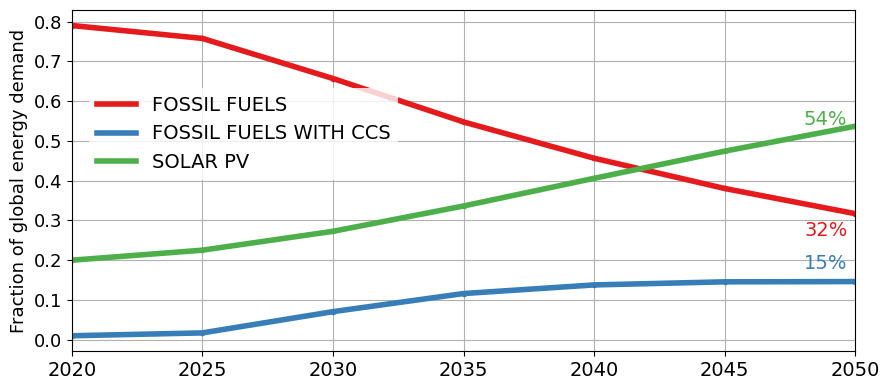

In [5]:
# Figure 2

custom_colors = list(sns.color_palette("Set1", 3)) * 3

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=custom_colors)

fig, ax = plt.subplots(1, 1, figsize=(9, 4))
baseline_lines = plt.plot(baseline_df.T, marker=".", lw=4)

# legend handles for energy sources
baseline_handles = [
    Line2D(
        [0],
        [0],
        color=baseline_lines[i].get_color(),
        lw=4,
        label=baseline_df.index[i].replace("_", " ").upper(),
    )
    for i in range(len(baseline_df.index))
]

leg = plt.legend(
    handles=baseline_handles,
    loc="upper left",
    bbox_to_anchor=(0.01, 0.8),
    fontsize=14,
)
leg.get_frame().set_facecolor("white")
leg.get_frame().set_alpha(0.8)
leg.get_frame().set_linewidth(0.0)
# Add the custom lines to the legend


plt.grid()
plt.ylabel("Fraction of global energy demand", fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlim(2020, 2050)

# add 2050 percentages for each of the three:
# fossil ccs
adjusts = [-0.018, 0.07, 0.04]
for i, e in enumerate(
    [
        "fossil_fuels",
        "fossil_fuels_with_CCS",
        "solar_pv",
    ]
):
    pct = baseline_df.loc[e, 2050] * 100
    vertical_loc = baseline_df.loc[e, 2050] + adjusts[i]
    plt.text(
        2049.7,
        vertical_loc,
        f"{pct:.0f}%",
        horizontalalignment="right",
        verticalalignment="top",
        fontsize=14,
        color=custom_colors[i],
    )

fig.tight_layout()
fig.savefig("fig_2.png")
fig.savefig("fig_2.pdf")
plt.show()

### Figure 3: Varying parameters one at a time to see how that affects final simulated fractions

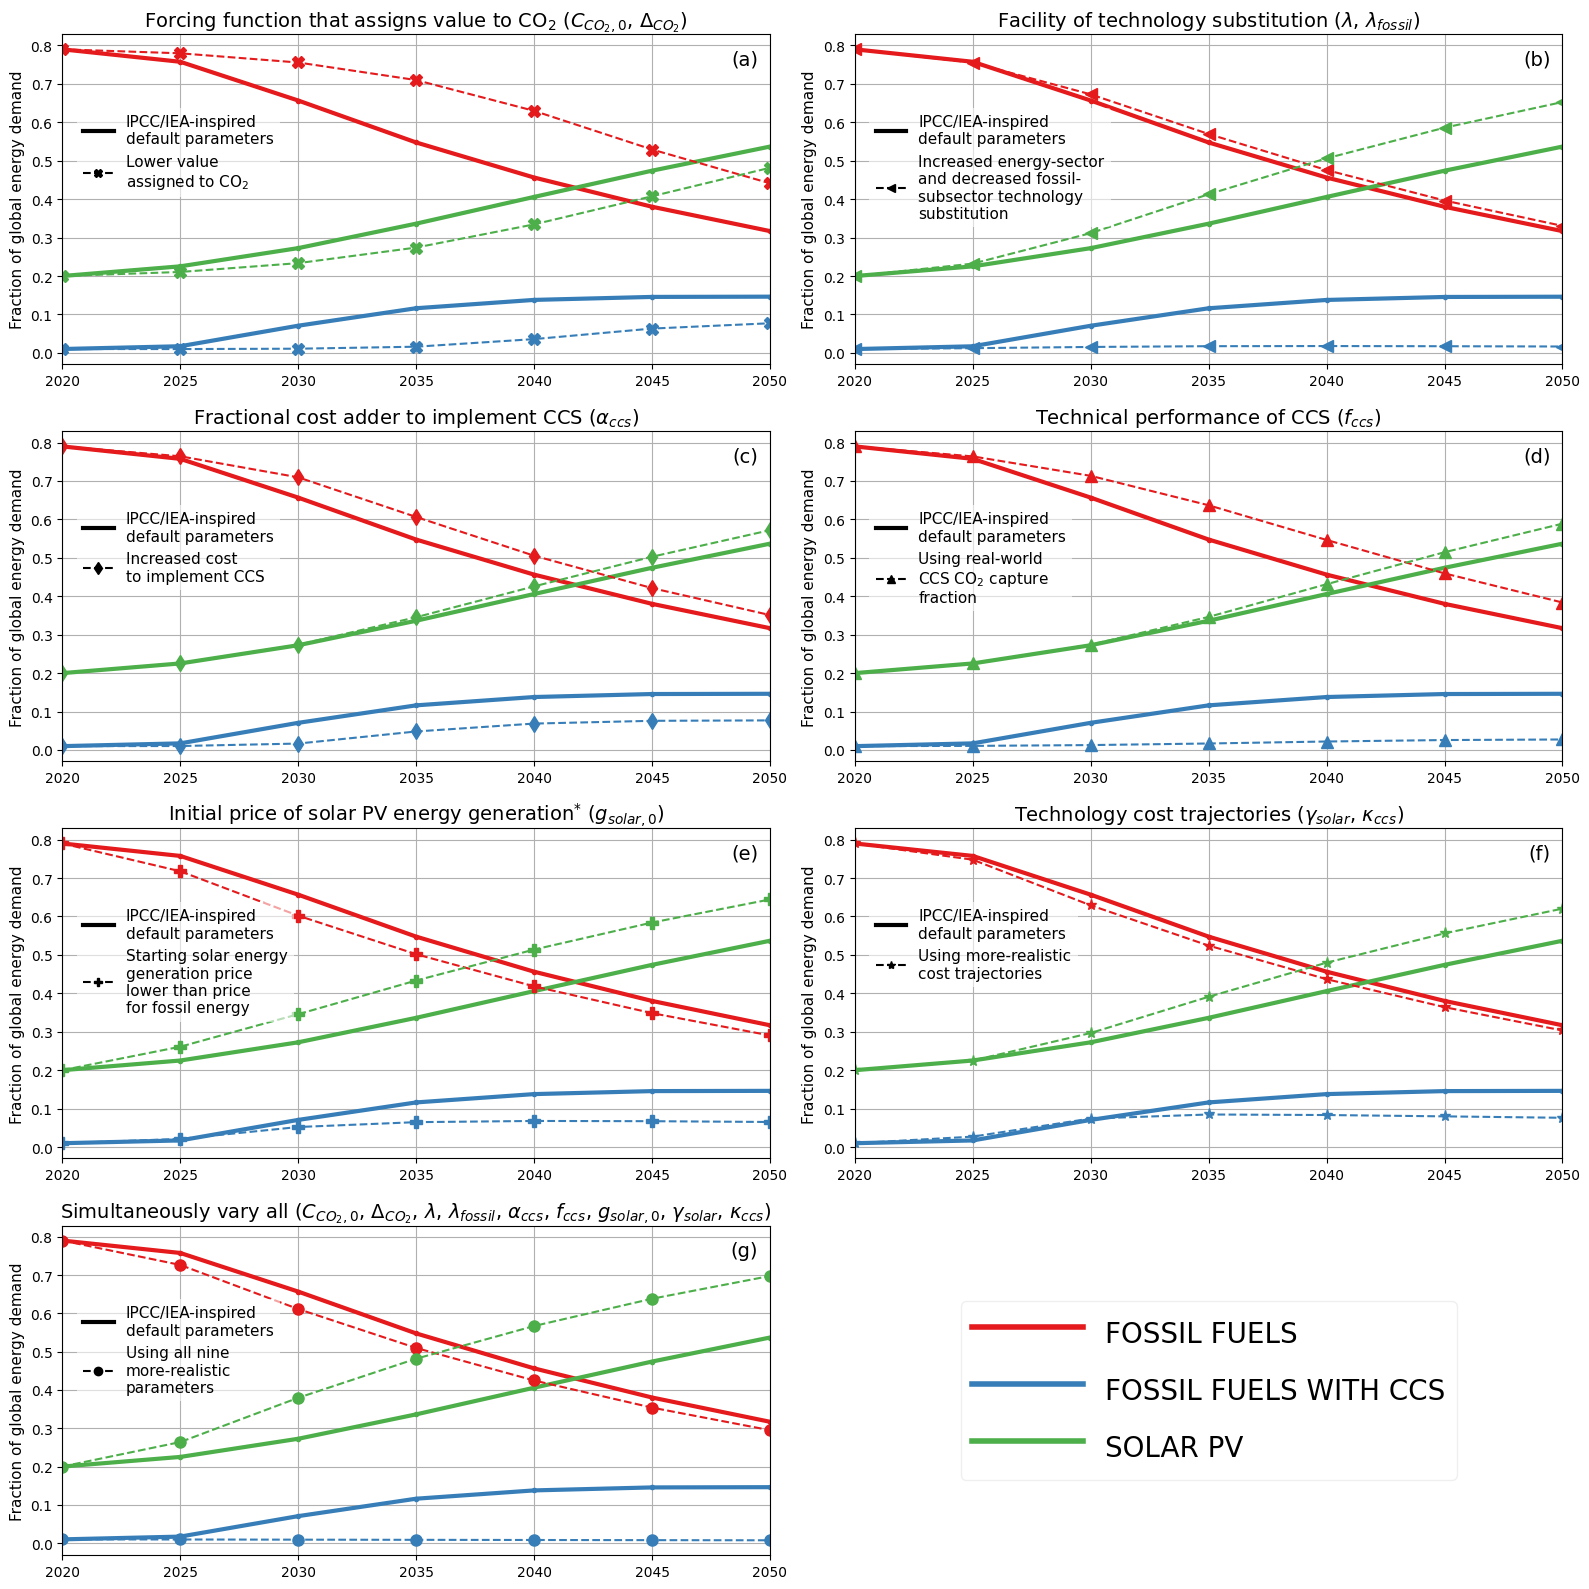

In [6]:
# figure 3
custom_colors = list(sns.color_palette("Set1", 3)) * 3
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=custom_colors)


titlefontsize = 14
yfontsize = 11
baselinemarker = "."
baselinelw = 3
markers = ["X", "<", "d", "^", "P", "*", "o"]
markersize = 8
lws = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
linestyles = ["--"] * 7
labels = [
    "Lower value\nassigned to " + r"${\mathrm{CO_2}}$",
    "Increased energy-sector\nand decreased fossil-\nsubsector technology\nsubstitution",
    "Increased cost\nto implement CCS",
    "Using real-world\n" + r"CCS ${\mathrm{CO_2}}$" + " capture\nfraction",
    "Starting solar energy\ngeneration price\nlower than price\nfor fossil energy",
    "Using more-realistic\ncost trajectories",
    "Using all nine\nmore-realistic\nparameters",
]
titles = [
    r"Forcing function that assigns value to ${\mathrm{CO_2}}$ ($C_{CO_2,0}$, $\Delta_{CO_2}$)",
    r"Facility of technology substitution ($\lambda$, $\lambda_{\mathit{fossil}}$)",
    r"Fractional cost adder to implement CCS ($\alpha_{\mathit{ccs}}$)",
    r"Technical performance of CCS ($f_{\mathit{ccs}}$)",
    r"Initial price of solar PV energy generation$^{*}$ ($g_{\mathit{solar},0}$)",
    r"Technology cost trajectories ($\gamma_{\mathit{solar}}$, $\kappa_{\mathit{ccs}}$)",
    r"Simultaneously vary all ($C_{CO_2,0}$, $\Delta_{CO_2}$, $\lambda$, $\lambda_{\mathit{fossil}}$, $\alpha_{\mathit{ccs}}$, $f_{\mathit{ccs}}$, $g_{\mathit{solar},0}$, $\gamma_{\mathit{solar}}$, $\kappa_{\mathit{ccs}}$)",
]


panels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(16, (nrows * 4)))

# -- cycle through parameters ---
for i, plot_df in enumerate(
    [
        price_df,
        logit_df,
        cost_df,
        ccs_perf_df,
        starting_price_df,
        trajectory_df,
        iam_realistic_df,
    ]
):
    plt.subplot(nrows, ncols, i + 1)
    baseline_lines = plt.plot(baseline_df.T, marker=baselinemarker, lw=baselinelw)
    other_lines = plt.plot(
        plot_df.T,
        marker=markers[i],
        linestyle=linestyles[i],
        lw=lws[i],
        markersize=markersize,
    )
    plt.title(titles[i].replace("\n", " "), fontsize=titlefontsize)
    # Create legend lines (black to show meaning associated with difference in line styles that applies across color groupings)
    default_line = Line2D(
        [0],
        [0],
        color="black",
        lw=baselinelw,
        label="IPCC/IEA-inspired\ndefault parameters",
    )  # Solid line
    realistic_line = Line2D(
        [0],
        [0],
        color="black",
        lw=lws[i],
        ls=linestyles[i],
        marker=markers[i],
        label=labels[i],
    )
    handles = [default_line, realistic_line]
    loc_leg = plt.legend(
        handles=handles,
        fontsize=11,
        bbox_to_anchor=(0.01, 0.8),
        loc="upper left",
    )
    frame = loc_leg.get_frame()
    frame.set_facecolor("white")
    frame.set_alpha(0.6)
    frame.set_linewidth(0.0)
    # loc_leg.set_frame_on(False)
    plt.ylabel("Fraction of global energy demand", fontsize=yfontsize)
    plt.grid(True, zorder=0)
    plt.xlim((2020, 2050))

    # append panel label
    plt.text(
        2049.5,
        0.79,
        panels[i],
        horizontalalignment="right",
        verticalalignment="top",
        fontsize=14,
    )


# Create legend handles for baseline sources
baseline_handles = [
    Line2D(
        [0],
        [0],
        color=baseline_lines[i].get_color(),
        lw=4,
        label=baseline_df.index[i].replace("_", " ").upper(),
    )
    for i in range(len(baseline_df.index))
]

plt.subplot(nrows, ncols, int(nrows * ncols))
plt.axis("off")
# custom legend for bottom right plot

baseline_handles = [
    Line2D(
        [0],
        [0],
        color=baseline_lines[i].get_color(),
        lw=baselinelw + 1,
        label=baseline_df.index[i].replace("_", " ").upper(),
    )
    for i in range(len(baseline_df.index))
]
leg = plt.legend(
    handles=baseline_handles,
    handlelength=4,  # 🔑 default is ~2, increase this for longer lines
    handleheight=2,  # optional, affects vertical spacing
    loc="center",
    fontsize=20,
)  #
leg.get_frame().set_facecolor("white")
leg.get_frame().set_alpha(0.3)
# leg.set_frame_on(False)
fig.tight_layout()
fig.savefig("fig_3.png")
fig.savefig("fig_3.pdf")

### Format PV projection data source table for paper

In [7]:
table_df = pd.read_csv(
    "/Users/lindseygulden/Downloads/CCS and PV projections - pv_proj_table_for_paper.csv"
)
table_df.fillna("", inplace=True)
table_df["data points"] = [
    {y: d} for y, d in zip(table_df.year, table_df.world_solar_pv_twh)
]

grouped_table_df = (
    table_df.groupby(
        [
            "source",
            "prediction_year",
            "which_prediction",
            "scenario",
        ]
    )["data points"]
    .agg(
        lambda rows: {
            k: v for k, v in sorted({k: v for d in rows for k, v in d.items()}.items())
        }
    )
    .reset_index()
)
n_preds_df = (
    table_df.groupby(["prediction_year"])["which_prediction"].max().reset_index()
)
n_preds_df.columns = ["prediction_year", "n_preds"]
grouped_table_df = grouped_table_df.merge(n_preds_df, on="prediction_year")
grouped_table_df["which_prediction"] = [
    str(w) + " of " + str(n)
    for w, n in zip(grouped_table_df.which_prediction, grouped_table_df.n_preds)
]
grouped_table_df.drop(columns=["n_preds"], inplace=True)
grouped_table_df.to_clipboard()

### Format CCS projection data-source table for paper

In [8]:
table_df = pd.read_csv(
    "/Users/lindseygulden/Downloads/CCS and PV projections - ccs_proj_table_for_paper.csv"
)
table_df.fillna("", inplace=True)
table_df["data points"] = [
    {y: d} for y, d in zip(table_df.year, table_df.mt_co2_per_yr)
]

grouped_table_df = (
    table_df.groupby(
        [
            "source",
            "prediction_year",
            "which_prediction",
            "scenario",
        ]
    )["data points"]
    .agg(
        lambda rows: {
            k: v for k, v in sorted({k: v for d in rows for k, v in d.items()}.items())
        }
    )
    .reset_index()
)
n_preds_df = (
    table_df.groupby(["prediction_year"])["which_prediction"].max().reset_index()
)
n_preds_df.columns = ["prediction_year", "n_preds"]
grouped_table_df = grouped_table_df.merge(n_preds_df, on="prediction_year")
grouped_table_df["which_prediction"] = [
    str(w) + " of " + str(n)
    for w, n in zip(grouped_table_df.which_prediction, grouped_table_df.n_preds)
]
grouped_table_df.drop(columns=["n_preds"], inplace=True)
grouped_table_df.to_clipboard()

# Get some more data

### Read in LHS Uncertainty Ensemble and the Saltelli SA outputs

In [9]:
# LHS uncertainty ensemble
df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/lhsdata_revised/simulation_outputs.csv"
)
df.columns = [
    "energy_source",
    "2020",
    "2025",
    "2030",
    "2035",
    "2040",
    "2045",
    "2050",
    "iteration",
]
# SA outputs
s1_df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/revised_data/S1_results.csv"
)
st_df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/revised_data/s_total_results.csv"
)
pars_df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/lhsdata_revised/simulation_parameters.csv"
)
s2_df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/iam/revised_data/S2_results.csv"
)
s2_df.set_index("parameter", inplace=True)

### SA table outputs

In [10]:
st_df.merge(s1_df, on="parameter").sort_values(by="ST", ascending=False).to_clipboard()
st_df.merge(s1_df, on="parameter").sort_values(by="ST", ascending=False)

,parameter,ST,ST_conf,S1,S1_conf
6,energy_sector_logit_exponent,0.661415,0.120109,0.132255,0.064179
2,ccs_capture_fraction,0.526631,0.117961,0.041273,0.023366
8,co2_total_increase_in_price,0.375347,0.090781,0.045898,0.032323
5,fossil_subsector_logit_exponent,0.324125,0.096562,0.021373,0.029923
1,ccs_cost_adder_fraction,0.170244,0.047144,0.025016,0.030394
3,solar_pv_learning_curve,0.083338,0.023592,0.011602,0.010804
7,co2_starting_price,0.036137,0.010579,0.008946,0.014242
0,starting_price_solar_pv,0.018637,0.006215,0.006498,0.011561
4,ccs_learning_curve,0.014500,0.005052,0.004200,0.007201


### Appendix Figure A.3: Heatmap of Saltelli second-order sensitivity indices showing parameter interaction

[Text(2020.0, 0, 'starting\nprice\nsolar\npv'),
 Text(2025.0, 0, 'ccs\ncost\nadder\nfraction'),
 Text(2030.0, 0, 'ccs\ncapture\nfraction'),
 Text(2035.0, 0, 'solar\npv\nlearning\ncurve'),
 Text(2040.0, 0, 'ccs\nlearning\ncurve'),
 Text(2045.0, 0, 'fossil\nsubsector\nlogit\nexponent'),
 Text(2050.0, 0, 'energy\nsector\nlogit\nexponent')]

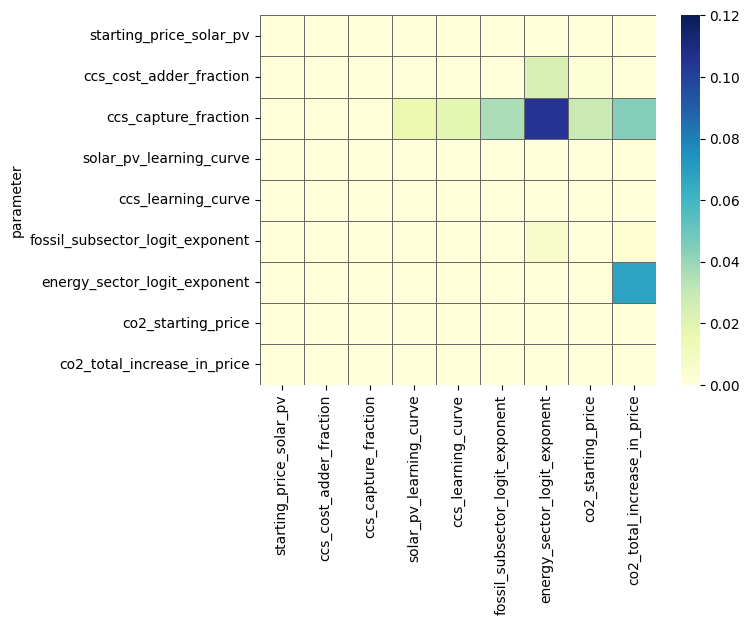

In [ ]:
# Figure A.3
#
sns.heatmap(
    data=s2_df,
    cmap="YlGnBu",
    vmin=0,
    vmax=0.12,
    linecolor="dimgrey",  # color of the grid lines
    linewidths=0.5,
)
ax.set_xticklabels([x.replace("_", "\n") for x in list(s2_df.index)])

### Appendix Figure A.1: linear correlation between parameter values and model outputs

[Text(0.5, 0, 'ccs\n2025'),
 Text(1.5, 0, 'ccs\n2030'),
 Text(2.5, 0, 'ccs\n2035'),
 Text(3.5, 0, 'ccs\n2040'),
 Text(4.5, 0, 'ccs\n2045'),
 Text(5.5, 0, 'ccs\n2050'),
 Text(6.5, 0, 'solar\n2025'),
 Text(7.5, 0, 'solar\n2030'),
 Text(8.5, 0, 'solar\n2035'),
 Text(9.5, 0, 'solar\n2040'),
 Text(10.5, 0, 'solar\n2045'),
 Text(11.5, 0, 'solar\n2050')]

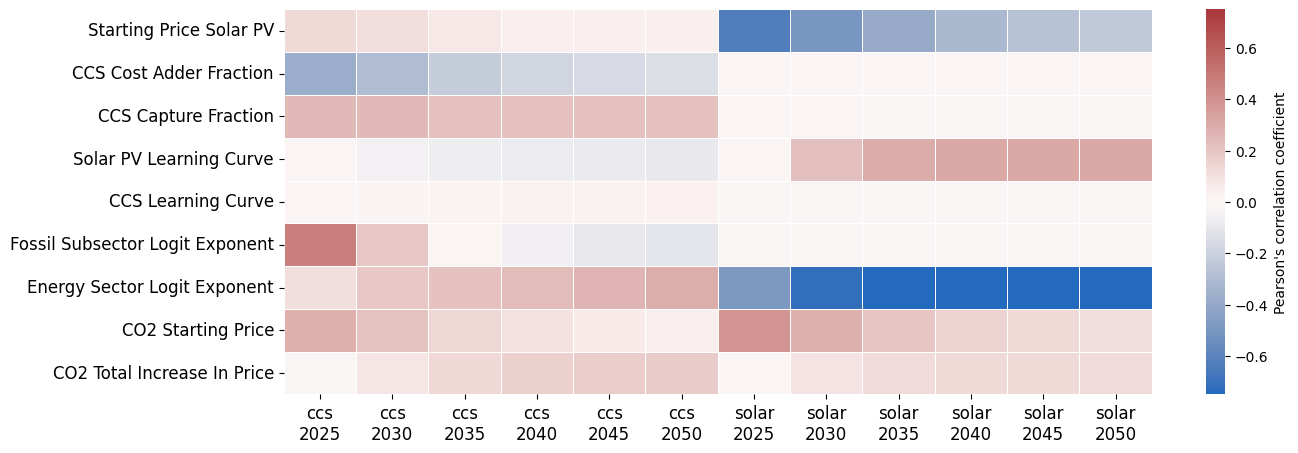

In [21]:
# prep work for Figure A.1
# reformat outputs to focus on CCS and solar through timesteps

ccs_df = df.loc[df.energy_source == "fossil_fuels_with_CCS"]
ccs_df.columns = ["ccs_" + x if len(x) == 4 else x for x in ccs_df.columns.values]
ccs_df.drop("energy_source", axis=1, inplace=True)
solar_df = df.loc[df.energy_source == "solar_pv"]
solar_df.drop("energy_source", axis=1, inplace=True)
solar_df.columns = ["solar_" + x if len(x) == 4 else x for x in solar_df.columns.values]
solar_ccs_df = ccs_df.merge(
    solar_df.merge(pars_df, left_on="iteration", right_index=True),
    on="iteration",
)

### Get correlation matrix
corr_df = solar_ccs_df.corr()

pars = list(pars_df.columns.values)
outputs = [
    "ccs_2025",
    "ccs_2030",
    "ccs_2035",
    "ccs_2040",
    "ccs_2045",
    "ccs_2050",
    "solar_2025",
    "solar_2030",
    "solar_2035",
    "solar_2040",
    "solar_2045",
    "solar_2050",
]

# Figure A1
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
sns.heatmap(
    data=corr_df.loc[pars, outputs],
    cmap="vlag",
    vmin=-0.75,
    vmax=0.75,
    ax=ax,
    edgecolor="black",
    linewidths=0.5,
    cbar_kws={"label": "Pearson's correlation coefficient"},
)
ax.set_yticklabels(
    [
        x.replace("_", " ")
        .title()
        .replace("Ccs", "CCS")
        .replace("Pv", "PV")
        .replace("Co2", "CO2")
        .replace("Of", "of")
        .replace("Per", "per")
        for x in pars
    ],
    fontsize=12,
)
ax.set_xticklabels([x.replace("_", "\n") for x in outputs], rotation=0, fontsize=12)

In [ ]:
sns.scatterplot(
    data=solar_ccs_df,
    y="solar_2050",
    hue="fossil_subsector_logit_exponent",
    x="energy_sector_logit_exponent",
)

### Look at entire dataset of simulation outputs and show how distribution of shares changes across time

In [ ]:
melt_df = df.melt(
    id_vars=["energy_source", "iteration"],
    value_vars=[str(x) for x in [2020, 2025, 2030, 2035, 2040, 2045, 2050]],
    value_name="share",
    var_name="time",
)

baseline_melt_df = baseline_df.reset_index().melt(
    id_vars=["energy_source"],
    value_vars=[int(x) for x in [2020, 2025, 2030, 2035, 2040, 2045, 2050]],
    value_name="share",
    var_name="time",
)
baseline_melt_df["time"] = baseline_melt_df["time"].astype(str)


# get median values for plotting to assist visual interpretation
median_df = df.groupby("energy_source").median().reset_index()
median_df.drop("iteration", axis=1, inplace=True)
median_df = median_df.melt(id_vars="energy_source", var_name="time", value_name="share")

### Figure 4: Ensemble simulated energy transition

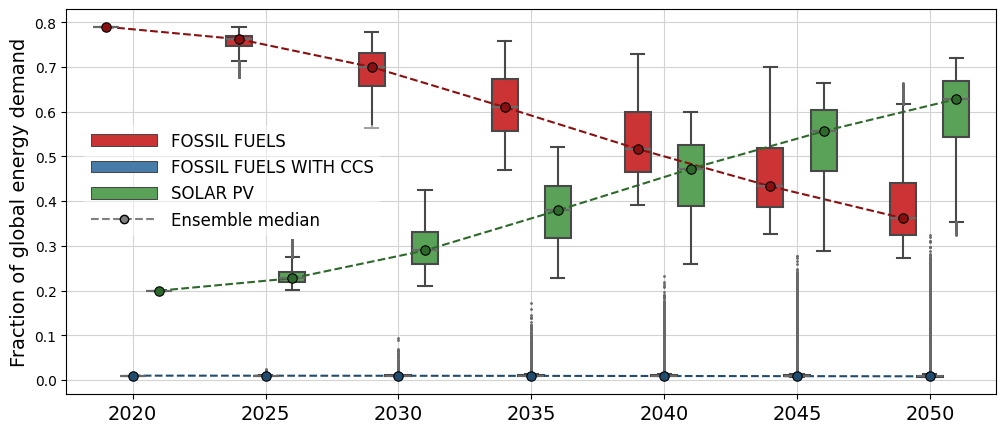

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# Define palette
hue_order = melt_df["energy_source"].unique()
base_palette = sns.color_palette("Set1", n_colors=len(hue_order))
darker_palette = sns.color_palette(
    [(r * 0.6, g * 0.6, b * 0.6) for r, g, b in base_palette]
)

# Pointplot (set zorder > 0 to be above grid)
sns.pointplot(
    data=median_df,
    x="time",
    y="share",
    hue="energy_source",
    hue_order=hue_order,
    palette=darker_palette,
    dodge=0.4,
    markers="o",
    scale=1,
    errorbar=None,
    linestyles="--",
    join=True,
    ax=ax,
)
for line in ax.lines:
    line.set_linewidth(1.5)
    line.set_linestyle("--")
    line.set_markersize(5)
    line.set_zorder(5)  # ensure above grid

for collection in ax.collections:
    collection.set_edgecolor("black")
    collection.set_linewidth(0.8)
    collection.set_zorder(5)  # ensure above grid

# Boxplot (zorder already low so behind points)
sns.boxplot(
    data=melt_df,
    x="time",
    y="share",
    hue="energy_source",
    hue_order=hue_order,
    palette=base_palette,
    width=0.6,
    ax=ax,
    flierprops=dict(
        marker=".",
        markersize=2,
        markeredgecolor="dimgrey",
        linewidth=0.5,
    ),
    medianprops=dict(
        color="dimgray",
        linewidth=1.5,
        linestyle="-",
    ),
    zorder=1,
)

# Labels
ax.set_xlabel("")
ax.set_ylabel("Fraction of global energy demand", fontsize=14)
ax.set_xticklabels(
    labels=[str(x) for x in [2020, 2025, 2030, 2035, 2040, 2045, 2050]],
    fontsize=14,
)

# Legend
handles, labels = ax.get_legend_handles_labels()
handles, labels = handles[-3:], labels[-3:]

custom = Line2D(
    [0],
    [0],
    color="grey",
    linestyle="--",
    linewidth=1.5,
    marker="o",
    markersize=6,
    markerfacecolor="grey",
    markeredgecolor="black",
    label="Ensemble median",
)

handles.append(custom)
labels.append("Ensemble median")
labels = [x.upper().replace("_", " ") if x != "Ensemble median" else x for x in labels]


leggy = ax.legend(
    handles,
    labels,
    handlelength=4,
    fontsize=12,
    title=None,
    bbox_to_anchor=(0.01, 0.72),
    loc="upper left",
)
leggy.get_frame().set_facecolor("white")
leggy.get_frame().set_alpha(0.5)
leggy.get_frame().set_linewidth(0.0)

# --- order everything ---
# grid goes behind everything
ax.grid(True, zorder=-1, color="lightgray")
for patch in ax.patches:
    patch.set_zorder(2)

# median lines go above grid
for line in ax.lines:
    line.set_zorder(3)

#  points are above grid
for collection in ax.collections:
    collection.set_zorder(4)

fig.savefig("fig_4.pdf")
fig.savefig("fig_4.png")

### Table data for paper table 3

In [ ]:
# Raw output for stats table to describe ensemble (Table 3)

stats_df = (
    df[["energy_source", "2050"]]
    .groupby("energy_source")
    .agg(["mean", "std", "median", "min", "max"])
    .reset_index()
)
stats_df.columns = [
    "energy_source",
    "mean_share_in_2050",
    "std_of_2050_share",
    "coefficient of variation",
    "median_share_in_2050",
    "min_share_in_2050",
    "max_share_in_2050",
]


# get percetnile iin distribution

row_list = []

for e in df.energy_source.unique():
    row_dict = {}
    row_dict["energy_source"] = e
    row_dict["IEA/IPCC-inspired parameters"] = stats.percentileofscore(
        df[["energy_source", "2050"]].loc[df.energy_source == e]["2050"].to_list(),
        baseline_df.loc[e, 2050],
        kind="mean",
    )
    row_dict["realistic parameters"] = stats.percentileofscore(
        df[["energy_source", "2050"]].loc[df.energy_source == e]["2050"].to_list(),
        iam_realistic_df.loc[e, 2050],
        kind="mean",
    )
    row_list.append(row_dict.copy())

percentile_df = pd.DataFrame(row_list)
percentile_df.merge(stats_df, on="energy_source").to_clipboard()
percentile_df.merge(stats_df, on="energy_source")

,energy_source,IEA/IPCC-inspired parameters,realistic parameters,mean_share_in_2050,std_of_2050_share,coefficient of variation,median_share_in_2050,min_share_in_2050,max_share_in_2050
0,fossil_fuels,19.919,5.381,0.392727,0.091112,0.231997,0.361912,0.272310,0.663366
1,fossil_fuels_with_CCS,99.526,9.863,0.012425,0.017734,1.427315,0.008501,0.007464,0.325275
2,solar_pv,23.974,94.765,0.594848,0.095745,0.160956,0.628427,0.325188,0.720007


In [20]:
print(iam_realistic_df[2050])
print("")
print(baseline_df[2050])

energy_source
fossil_fuels             0.294929
fossil_fuels_with_CCS    0.007595
solar_pv                 0.697476
Name: 2050, dtype: float64

energy_source
fossil_fuels             0.316888
fossil_fuels_with_CCS    0.146236
solar_pv                 0.536876
Name: 2050, dtype: float64


### Figure 5: 2050 simulated shares of energy sources: ensemble distributions compared to realistic and default parameters


In [ ]:
# Figure 5
sns.set_context("notebook")
locations = ["upper right", "center right", "upper left"]
energy_sources = list(df["energy_source"].unique())
base_palette = sns.color_palette("Set1", n_colors=len(energy_sources))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, e in enumerate(energy_sources):
    ax = axes[i]

    # KDE plot
    kdeplot = sns.kdeplot(
        data=df.loc[df.energy_source == e, "2050"],
        common_norm=True,
        ax=ax,
        fill=True,
        color=base_palette[i],
    )

    # Solid black line
    ax.plot([baseline_df.loc[e, 2050]] * 2, ax.get_ylim(), color=base_palette[i], lw=2)

    # Dashed black line
    ax.plot(
        [iam_realistic_df.loc[e, 2050]] * 2,
        ax.get_ylim(),
        "--",
        color=base_palette[i],
        lw=1.5,
    )
    ylims = ax.get_ylim()
    ax.set_ylim(ylims[0], round(ylims[1] * 0.9))
    # Axis limits
    ax.set_xlim(
        [
            df.loc[df.energy_source == e, "2050"].min() - 0.01,
            df.loc[df.energy_source == e, "2050"].quantile(0.995) + 0.01,
        ]
    )

    # Get KDE fill color for legend
    kde_color = kdeplot.collections[0].get_facecolor()[0]

    # Custom legend handles
    legend_handles = [
        Patch(
            facecolor=kde_color,
            edgecolor="none",
            label="Distribution of Mini-SEM\nmodeled energy share",
        ),
        Line2D(
            [0],
            [0],
            color="black",
            linewidth=2,
            label="Share using\nIEA/IPCC-inspired\ndefault parameters",
        ),
        Line2D(
            [0],
            [0],
            color="black",
            linestyle="--",
            linewidth=1.5,
            label="Share using\nrealistic parameters",
        ),
    ]

    # Add legend to subplot
    # ax.legend(handles=legend_handles, loc=locations[i])

    # Labels and title
    ax.set_title(
        "Ensemble of simulated 2050 global energy share\nsupplied by "
        + e.replace("_", " ").upper()
    )
    ax.set_xlabel("Fraction of 2050 energy demand")
    if i > 0:
        ax.set_ylabel("")
# add annotations to fossil fuels panel
axes[0].text(
    0.4,
    5.5,
    "Unabated fossil-fuel share\nsimulated with IEA/IPCC-inspired\ndefault parameters",
    fontsize=10,
)
axes[0].annotate("", xytext=(0.4, 6), xy=(0.317, 6), arrowprops=dict(arrowstyle="->"))
axes[0].text(
    0.35,
    0.9,
    "Unabated\nfossil-fuel share\nsimulated with\nrealistic parameters",
    fontsize=10,
)
axes[0].annotate(
    "",
    xytext=(0.35, 1.8),
    xy=(0.295, 1.8),
    arrowprops=dict(arrowstyle="->"),
)

# add annotations to fossil fuels with CCS panel
axes[1].text(
    0.13,
    40,
    "Fossil-with-CCS share\nsimulated with\nIEA/IPCC-inspired\ndefault\nparameters\n\n(>99.5% of all\nsimulated shares)",
    fontsize=10,
    ha="right",
)
axes[1].annotate(
    "", xytext=(0.13, 85), xy=(0.145, 85), arrowprops=dict(arrowstyle="->")
)
axes[1].text(
    0.03,
    105,
    "Fossil-with-CCS share\nsimulated using\nrealistic assumptions\n\n(<90% of simulated\nshares)",
    fontsize=10,
)
axes[1].annotate(
    "", xytext=(0.03, 140), xy=(0.009, 140), arrowprops=dict(arrowstyle="->")
)

# add annotations to solar PV share panel
axes[2].text(
    0.5,
    5,
    "Solar-PV share\nsimulated with\nIEA/IPCC-inspired\ndefault parameters\n\n(<76% of all\nsimulated shares)",
    ha="right",
    fontsize=10,
)
axes[2].annotate(
    "", xytext=(0.5, 7.2), xy=(0.54, 7.2), arrowprops=dict(arrowstyle="->")
)
axes[2].text(
    0.69,
    0.8,
    "Solar-PV share\nsimulated\nwith realistic\nparameters\n\n(>95% of all\nsimulated shares)",
    ha="right",
    fontsize=10,
)
axes[2].annotate("", xytext=(0.69, 2), xy=(0.725, 2), arrowprops=dict(arrowstyle="->"))
fig.tight_layout()
fig.savefig("fig_5.png")
fig.savefig("fig_5.pdf")